## This code compares the results of the adjacent planarity.ipynb with the checked checked in reference values.

In [1]:
from skspatial.objects import Points, Plane
from skspatial.plotting import plot_3d
import math
import cclib
import glob
import numpy as np
import csv

In [2]:
# Taken from planarity.ipynb
def planarity(list_of_points, plot=False):
    points = Points(list_of_points)
    plane = Plane.best_fit(points)

    #To plot plane in 3D
    if plot:
        plot_3d(
            points.plotter(c='red', s=50, depthshade=False),
            plane.plotter(alpha=0.25, lims_x=(-15, 15), lims_y=(-15, 15)),)
    
    x0 = plane.point[0]
    y0 = plane.point[1]
    z0 = plane.point[2]
    A = plane.vector[0]
    B = plane.vector[1]
    C = plane.vector[2]

    distances = []
    for p in points:
        x1 = p[0]
        y1 = p[1]
        z1 = p[2]

        distance = abs(A*(x1-x0) + B*(y1-y0) + C*(z1-z0))/math.sqrt(A*A + B*B + C*C)
        distances.append(distance)

    sum = 0
    for d in distances:
        sum = d + sum
    planarity = sum / len(distances)
    
    return planarity

In [3]:
import pandas as pd
df = pd.read_csv('../data_csv/planarity.csv').set_index('Molecule')
reference = df['Planarity (Angstrom)'].to_dict()

In [4]:
# Slightly factorized variant of the code from planarity.ipynb

def get_geometries(filename):
    myfile = cclib.io.ccopen(filename)
    values = myfile.parse()
    coords = values.atomcoords
    return coords

def extract_geometry(coords, step=-1):
    rows, cols = (len(coords[step]), 3)
    arr = []
    for c in range(0, rows):
        row = []
        for j in range(0, cols):
            row.append(coords[step][c][j])
        row = np.array(row)
        arr.append(row)

    arr = np.array(arr)
    return arr

molecules = []
planarities = []
for filename in sorted(glob.glob('../output_files/DFT/DFT_acceptors/*.out')):
    arr = extract_geometry(get_geometries(filename))
    filename = filename.rsplit('.',1)[0]
    filename = filename.split('/')[-1]
    molecules.append(filename)
    
    planarities.append(planarity(arr))
    
    if not np.isclose(planarities[-1], reference[filename]):
        print(f"For {filename}, the obtained planarity deviates from reference: "
            + f"{planarities[-1]:g} != {reference[filename]:g}")
    else:
        print(molecules[-1], ':', planarities[-1])

AQx-2 : 0.8408029419455445
AQx : 0.8767608610955374
BCDT-4Cl : 1.0362347854898366
BCDT-4F : 1.2322640717178746
BDTN-BF : 1.19913841482594
BDTN-Th : 1.4875424282691874
For BT6IC-HD-4Cl, the obtained planarity deviates from reference: 1.24137 != 1.58053
BTA3 : 2.568234745749291
BTA43 : 2.770906837872791
BTA53 : 1.4318487991277353
BTCIC-4Cl : 1.6732624108251464
BTCIC : 1.9569550343782907
BTDT2R : 0.4413873443432971
BTN-4F : 0.8658924482311195
BTP-4Cl : 0.49011033811601673
For BTP-PhC6, the obtained planarity deviates from reference: 2.30329 != 2.04103
BTSe-4F : 1.3590306267460008
BTTPC-Br : 1.2426860079418665
BTTPC : 1.2240959663216644
For CH1007, the obtained planarity deviates from reference: 1.54297 != 1.52349
CPDT-4Cl : 1.061169743971015
CPDT-4F : 0.9716755004274242
DTG-IW : 1.6904670029802522
EH-IDTBR : 1.9154435707466955
F-2F : 1.0562954895675865
F-H : 0.8668243029328273
FDICTF : 1.046692754176989
FO-2F : 1.5240269143617209
H2 : 1.6091598249906132
IDF-4F : 2.2033233144603397
IDF-IC 

In [5]:
# Inspect one molecule along the geometry optimization
molecule = 'N3'
coords = get_geometries(filename=f'../output_files/DFT/DFT_acceptors/{molecule}.out')
for step in range(len(coords)):
    arr = extract_geometry(coords, step)
    print(step, planarity(arr))
print(f"Reference value: {reference[molecule]:g}")

0 1.274722527821168
1 1.2674580155930717
2 1.1510307657084804
3 1.2919146663226846
4 1.215070964772677
5 1.2166709413724413
6 1.3147915696892347
7 1.1967850935440154
8 1.247220755426663
9 1.232009300320167
10 1.1443476534045771
11 1.1776731551088448
12 1.2136163485608227
13 1.238121998089833
14 1.2031407281424151
15 1.1683133946155326
16 1.1384189187574802
17 1.1489411525654343
18 1.1812371590636763
19 1.2538091124041084
20 1.2108117994379939
21 1.173755754126356
22 1.1373726951078582
23 1.1332579792196866
24 1.1230632095131212
25 1.1454953013440223
26 1.2307491073366659
27 1.1830266535350888
28 1.158390292266424
29 1.1155099204438217
30 1.0717210582168124
31 1.094097347432484
32 1.119860932454386
33 1.1409178559158857
34 1.1641842400834697
35 1.1574589138352245
36 1.0915428358602208
37 1.1255216028574289
38 1.1309580141668605
39 1.1360421536065564
40 1.1407397560176515
41 1.1291582846464052
42 1.1332422849040809
43 1.122323671873264
44 1.0752852612115649
45 1.1099037158798233
46 1.112

In [6]:
# Inspect another molecule along the geometry optimization
molecule = 'NIBT'
coords = get_geometries(filename=f'../output_files/DFT/DFT_acceptors/{molecule}.out')
for step in range(len(coords)):
    arr = extract_geometry(coords, step)
    print(step, planarity(arr))
print(f"Reference value: {reference[molecule]:g}")

0 2.6961104141249908
1 2.636761334250464
2 2.6298114809848165
3 2.715362951021853
4 2.7087066578818484
5 2.542230279243821
6 2.632352066884469
7 2.6495701409438364
8 2.5524272062297855
9 2.434297796270784
10 2.5750424345075174
11 2.6738593905949575
12 2.5549620155323605
13 2.486764703491256
14 2.5949631971202543
15 2.6505162663921173
16 2.6151422831238507
17 2.6235459124914726
18 2.628926290761253
19 2.656646868047848
20 2.6513189007960847
21 2.6266417449894326
22 2.6070571315039226
23 2.5668680605859953
24 2.6334078756398136
25 2.6741110047138172
26 2.726223431785992
27 2.6801504852646514
28 2.6220015145834346
29 2.6218883536593505
30 2.6103027127625293
31 2.646220157275152
32 2.7903083820778147
33 2.9271744247575757
34 2.8816882945257087
35 2.8812895094117548
36 2.859837979375032
37 2.827091125283545
38 2.7492357318516274
39 2.712507409915788
40 2.6465155423703934
41 2.6425315043382143
42 2.67601643758145
43 2.669863806118197
44 2.647631011637812
45 2.627431852188323
46 2.62199164675

In both cases, the reference value of the planarity measure does not occur during the geometry optimization either.

## Finally, let's plot the deviations from the reference values

In [7]:
# Relevant data as cloned from https://github.com/brigreens/OPEP:
d1 = {k: v for k, v in zip(molecules, planarities)}

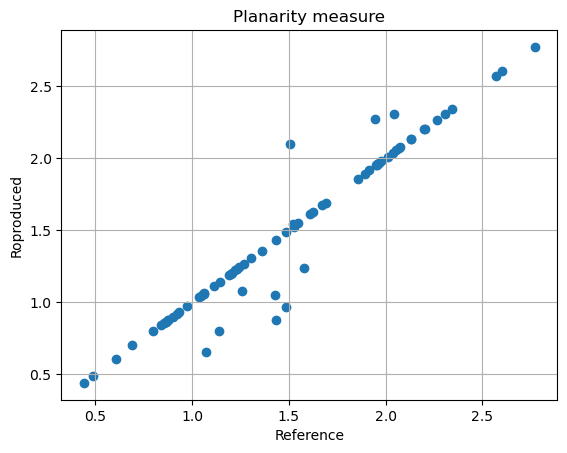

In [8]:
import matplotlib.pyplot as plt
plt.scatter(
    [reference[k] for k in sorted(reference.keys())],
    [d1[k] for k in sorted(reference.keys())])
plt.title('Planarity measure')
plt.xlabel('Reference')
plt.ylabel('Roproduced')
plt.grid()

Most of the planarity values are correctly reproduced, but 10 out of 73 are not.
I do not know why.